In [2]:
#I-94 Traffic Data set EDA

In [22]:
import pandas as pd


In [4]:
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [5]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

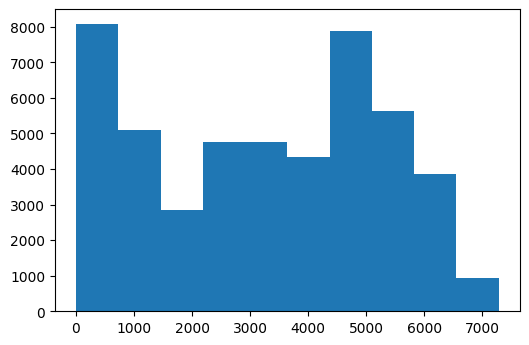

In [10]:
plt.hist(data['traffic_volume'])

In [11]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [15]:
data['hour'] = data['date_time'].dt.hour

In [18]:
daytime = data[(data['hour'] >=7) & (data['hour'] <19)]
nighttime = data[(data['hour'] <7) | (data['hour'] >=19)]

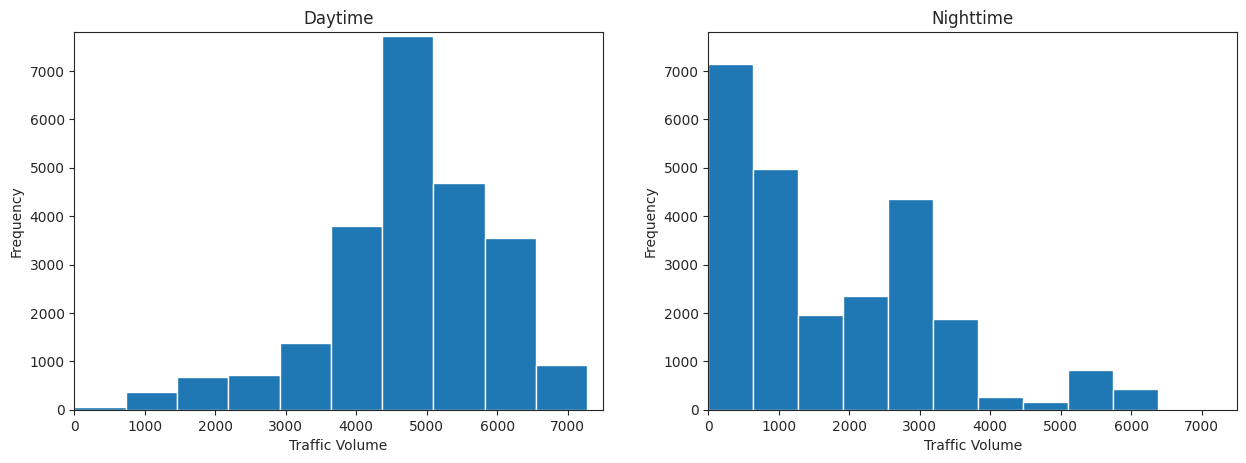

In [29]:

plt.figure(figsize = (15,5))

#plotting histogram for daytime traffic
plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"])
plt.title("Daytime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 7800])

#plotting histogram for nighttime traffic
plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"])
plt.title("Nighttime")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim([0, 7500])
plt.ylim([0, 7800])

plt.show()



<ipython-input-34-2e0eb0722bef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



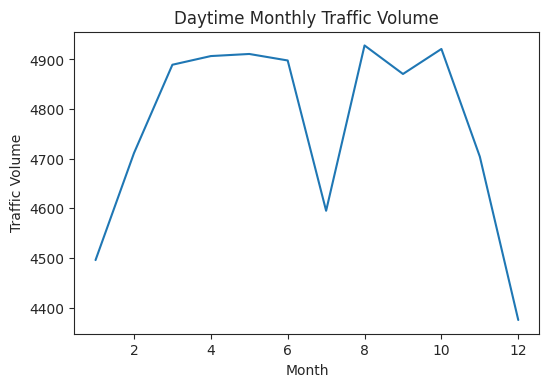

In [34]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Daytime Monthly Traffic Volume')
plt.show()


<ipython-input-35-c12e50f4aa3e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



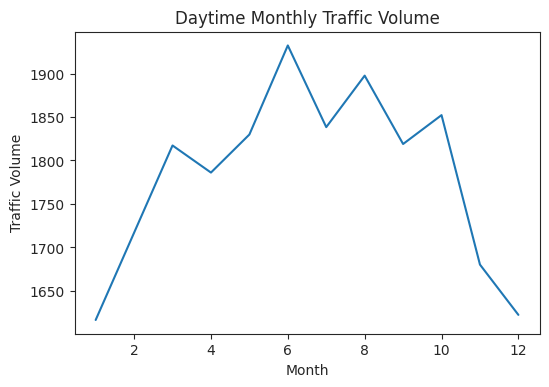

In [35]:
nighttime['month'] = nighttime['date_time'].dt.month
night_by_month = nighttime.groupby('month').mean()
night_by_month['traffic_volume']

plt.plot(night_by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Daytime Monthly Traffic Volume')
plt.show()

<ipython-input-36-466a3abcb1d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



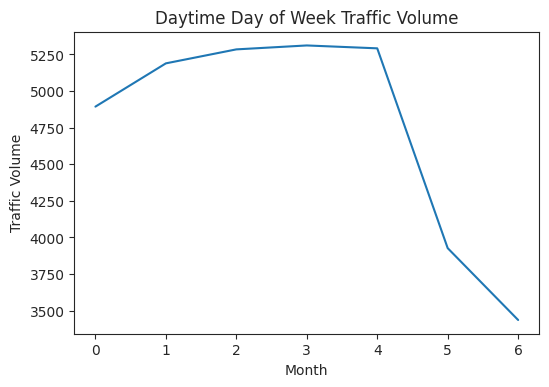

In [36]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
daytime_by_dayofweek = daytime.groupby('dayofweek').mean()

plt.plot(daytime_by_dayofweek['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Daytime Day of Week Traffic Volume')
plt.show()

#0 is Monday and 6 is Sunday

<ipython-input-37-284013d3c971>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



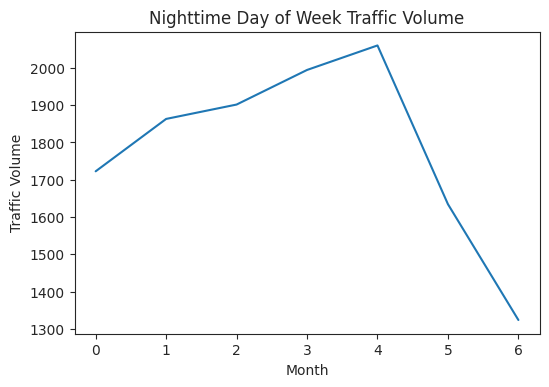

In [37]:
nighttime['dayofweek'] = nighttime['date_time'].dt.dayofweek
nighttime_by_dayofweek = nighttime.groupby('dayofweek').mean()

plt.plot(nighttime_by_dayofweek['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title('Nighttime Day of Week Traffic Volume')
plt.show()


#0 is Monday and 6 is Sunday

<ipython-input-40-24620a1a2d6b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



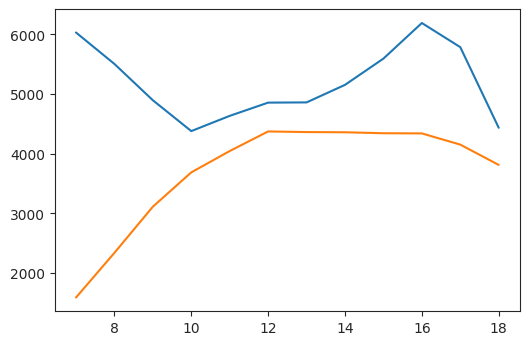

In [40]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.plot(by_hour_business['traffic_volume'])
plt.plot(by_hour_weekend['traffic_volume'])

In [51]:
print(data['traffic_volume'].corr(data['temp']))
print(data['traffic_volume'].corr(data['rain_1h']))
print(data['traffic_volume'].corr(data['snow_1h']))
print(data['traffic_volume'].corr(data['clouds_all']))


0.13029879817112658
0.00471370236785923
0.0007334345358283799
0.06705377704283502


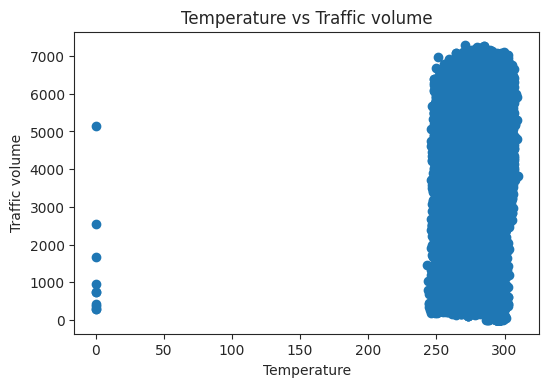

In [52]:
plt.scatter(data['temp'], data['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic volume')
plt.title('Temperature vs Traffic volume')
plt.show()

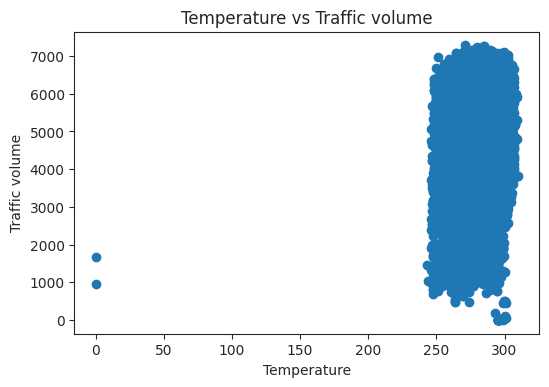

In [53]:
plt.scatter(daytime['temp'], daytime['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic volume')
plt.title('Temperature vs Traffic volume')
plt.show()

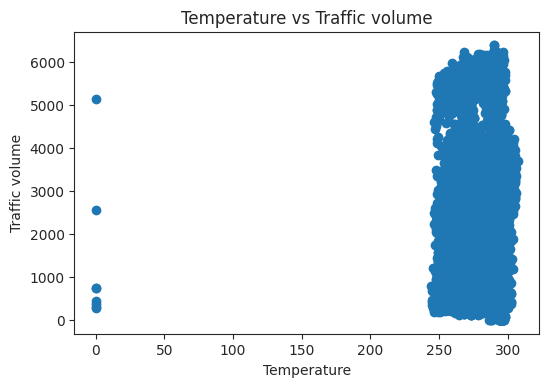

In [54]:
plt.scatter(nighttime['temp'], nighttime['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic volume')
plt.title('Temperature vs Traffic volume')
plt.show()

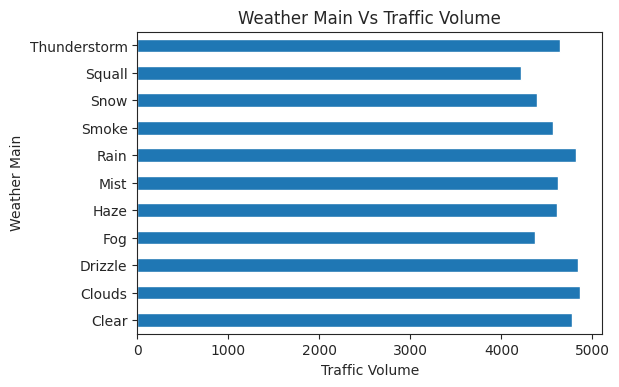

In [57]:
#by weather type daytime

by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.title("Weather Main Vs Traffic Volume")
plt.show()

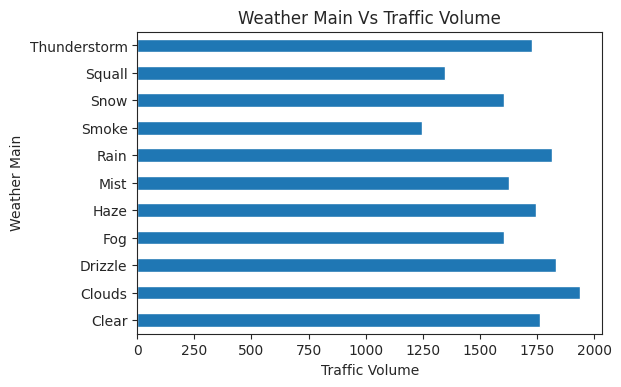

In [58]:
#by weather type nighttime

by_weather_main = nighttime.groupby('weather_main').mean()
by_weather_description = nighttime.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.title("Weather Main Vs Traffic Volume")
plt.show()